In [1]:
import pandas as pd

In [2]:
DATA = r"D:\Pastas\Hashtag Treinamentos\Customer Segmentation\data\Mall_Customers_no_CustomerID.csv"
df = pd.read_csv(DATA)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ["Age", "Annual Income (k$)", "Spending Score (1-100)"]),
        ("onehot", OneHotEncoder(), ["Gender"])  
    ]
)

df_transformed = preprocessing.fit_transform(df)

df_scaled = pd.DataFrame(
    df_transformed,
    columns=preprocessing.get_feature_names_out() 
)

df_scaled.head()

,standard__Age,standard__Annual Income (k$),standard__Spending Score (1-100),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


In [4]:
preprocessing

ColumnTransformer(transformers=[('standard', StandardScaler(),
                                 ['Age', 'Annual Income (k$)',
                                  'Spending Score (1-100)']),
                                ('onehot', OneHotEncoder(), ['Gender'])])

In [5]:
preprocessing.feature_names_in_

array(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype=object)

In [6]:
preprocessing.get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [7]:
df_scaled.to_csv(r"D:\Pastas\Hashtag Treinamentos\Customer Segmentation\data\Mall_Customers_no_CustomerID_scaled.csv", index=False)

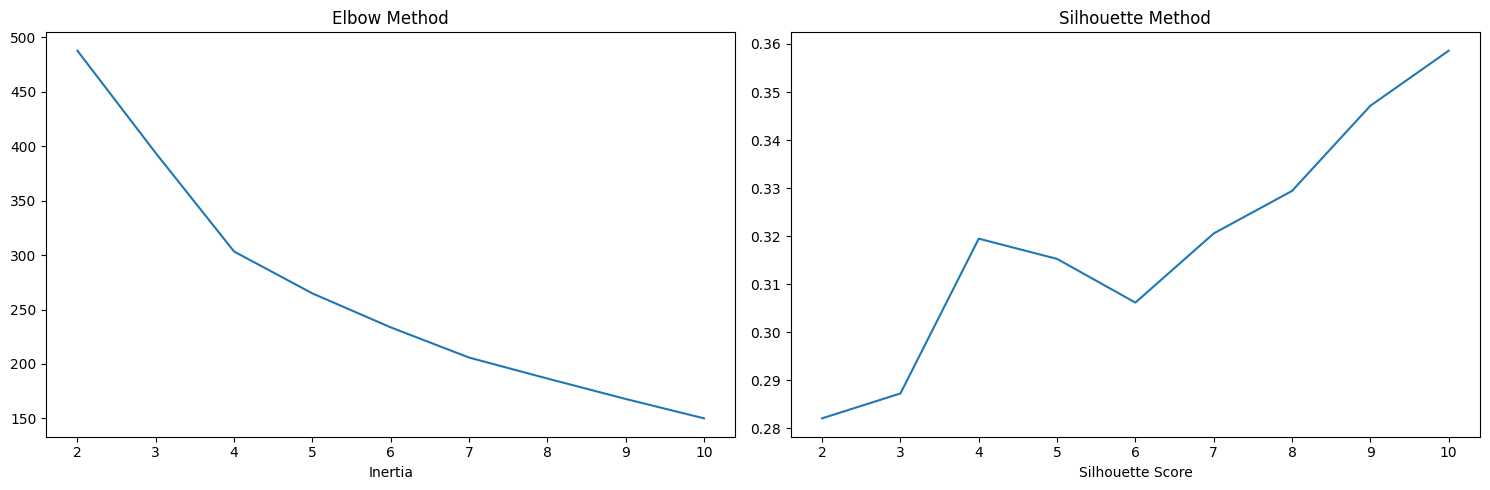

In [8]:
from utils import elbow_and_silhouette

elbow_and_silhouette(df_scaled)

In [9]:
from sklearn.cluster import KMeans

In [10]:
pipeline = Pipeline(
[
    ("preprocessing", preprocessing),
    ("clustering", KMeans(n_clusters=5, random_state=42, n_init=10))
]

)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

In [11]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('standard', StandardScaler(),
                                  ['Age', 'Annual Income (k$)',
                                   'Spending Score (1-100)']),
                                 ('onehot', OneHotEncoder(), ['Gender'])]),
 'clustering': KMeans(n_clusters=5, n_init=10, random_state=42)}

In [12]:
pipeline["clustering"].labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 1, 2, 4, 2,
       1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 4,
       1, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [13]:
df_clustered = df.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


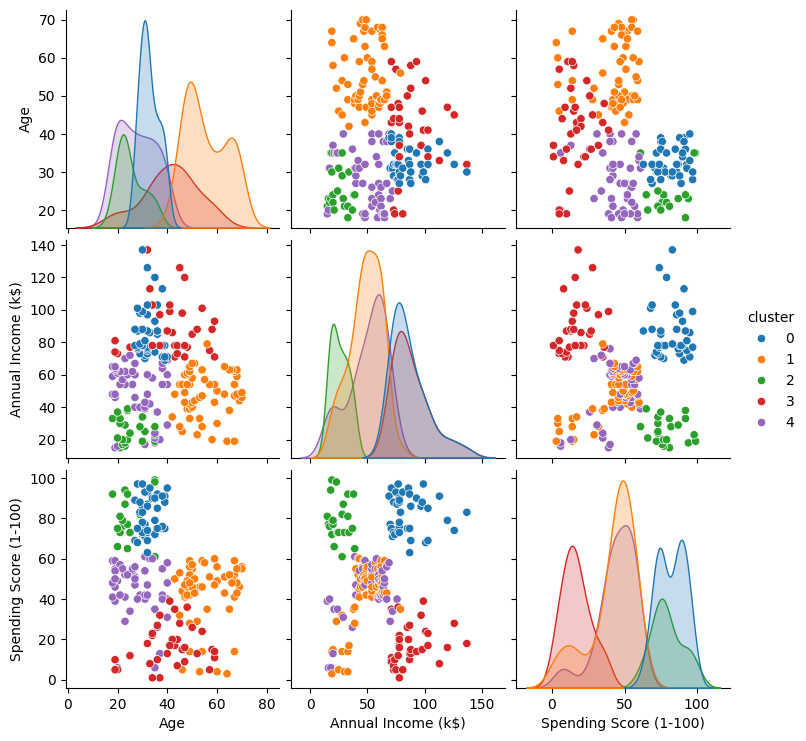

In [14]:
import seaborn as sns

sns.pairplot(df_clustered, diag_kind="kde", hue="cluster", palette="tab10")

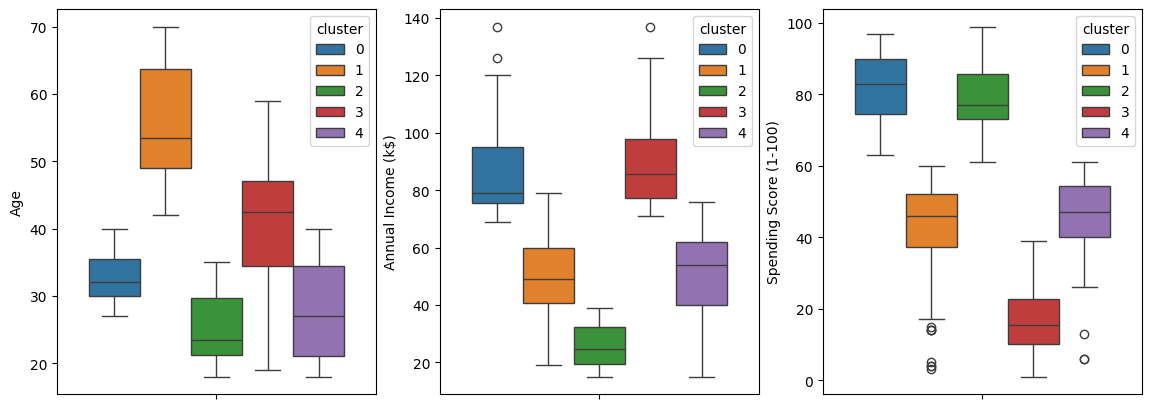

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14,5))
for ax, col, in zip(axs, df_clustered.select_dtypes('number')):
    sns.boxplot(data=df_clustered, hue="cluster", y=col, ax=ax, palette="tab10")

plt.show()

 - Cluster 0 - High spending score, average income, young age
 - Cluster 1 - Moderate spending score, moderate income, advanced age
 - Cluster 2 - High spending score, low income, young age
 - Cluster 3 - Low spending score, High income, moderate age
 - Cluster 4 - Moderate spending score, moderate income, young age

In [16]:
df_clustered["cluster"].value_counts().sort_index()

cluster
0    39
1    58
2    22
3    34
4    47
Name: count, dtype: int64

In [17]:
df_clustered.groupby(["cluster", "Gender"]).size()

cluster  Gender
0        Female    21
         Male      18
1        Female    33
         Male      25
2        Female    13
         Male       9
3        Female    14
         Male      20
4        Female    31
         Male      16
dtype: int64

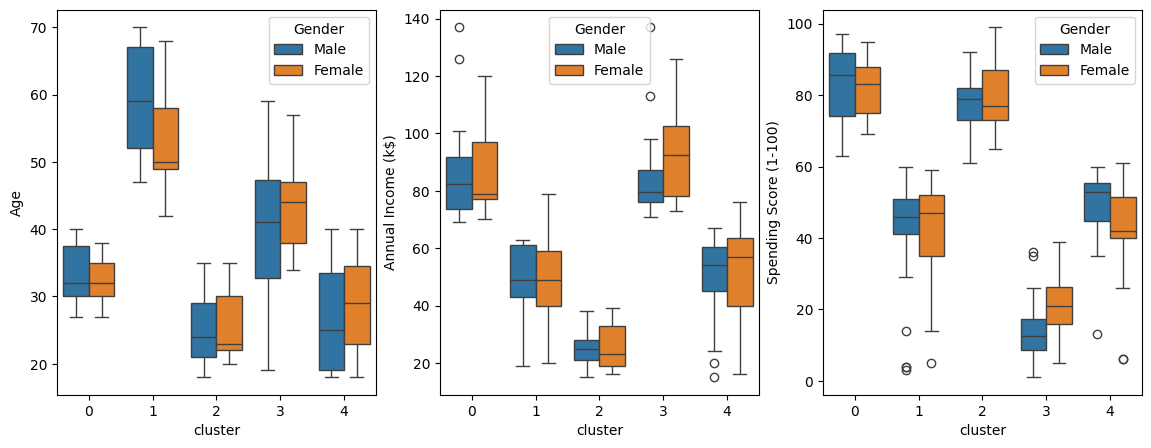

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14,5))
for ax, col, in zip(axs, df_clustered.select_dtypes('number')):
    sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10", hue="Gender")

plt.show()

In [19]:
pipeline["preprocessing"].get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [20]:
pipeline["clustering"].cluster_centers_

array([[-0.44191719,  0.99158305,  1.23950275,  0.53846154,  0.46153846],
       [ 1.19862745, -0.46098141, -0.32703818,  0.56896552,  0.43103448],
       [-0.97439592, -1.32954532,  1.13217788,  0.59090909,  0.40909091],
       [ 0.17329545,  1.06645385, -1.2980103 ,  0.41176471,  0.58823529],
       [-0.78172248, -0.40306917, -0.21591396,  0.65957447,  0.34042553]])

In [21]:
pipeline["clustering"].cluster_centers_[:, :-2]

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 1.19862745, -0.46098141, -0.32703818],
       [-0.97439592, -1.32954532,  1.13217788],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [-0.78172248, -0.40306917, -0.21591396]])

In [22]:
centroids = pipeline["clustering"].cluster_centers_[:, :-2]
centroids

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 1.19862745, -0.46098141, -0.32703818],
       [-0.97439592, -1.32954532,  1.13217788],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [-0.78172248, -0.40306917, -0.21591396]])

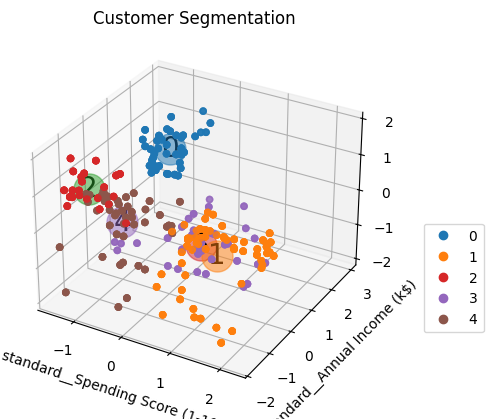

In [35]:
from utils import show_clusters

show_clusters(
    df_scaled, 
    ['standard__Age', 'standard__Annual Income (k$)', 'standard__Spending Score (1-100)'], 
    5,
    centroids,
    True,
    True,
    df_clustered["cluster"]     
)

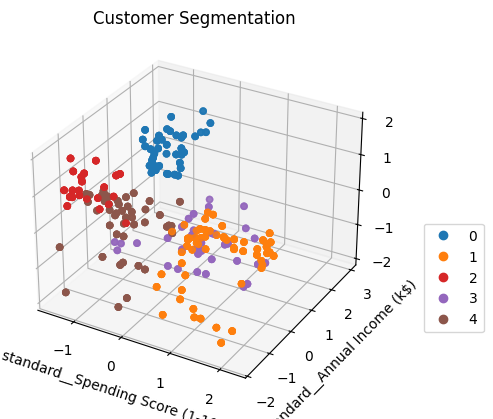

In [34]:
show_clusters(
    df_scaled, 
    ['standard__Age', 'standard__Annual Income (k$)', 'standard__Spending Score (1-100)'], 
    5,
    centroids,
    False,
    True,
    df_clustered["cluster"]     
)

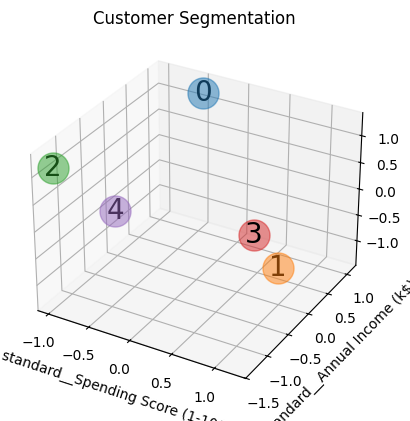

In [33]:
show_clusters(
    df_scaled, 
    ['standard__Age', 'standard__Annual Income (k$)', 'standard__Spending Score (1-100)'], 
    5,
    centroids,
    True,
    False,
    df_clustered["cluster"]     
)

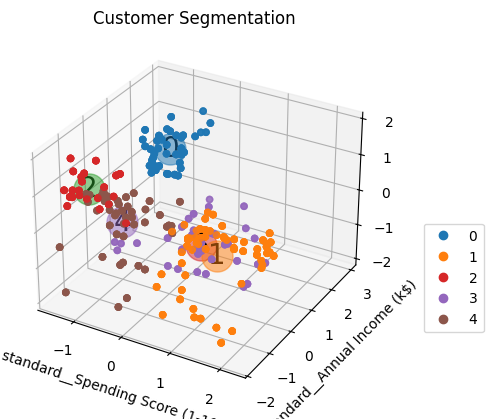

In [32]:
show_clusters(
    df_scaled, 
    ['standard__Age', 'standard__Annual Income (k$)', 'standard__Spending Score (1-100)'], 
    5,
    centroids,
    True,
    True,
    df_clustered["cluster"]    
)